# TD : Modèles et apprentissage en Machine Learning 

L'objectif de cette séance pratique et de regarder comment implémenter les différents modèles présentés lors des différentes séancs à l'aide de Python.

Nous commencerons notre travail sur des jeux de donnéessynthétiques afin de visualiser les résultats des différents modèles, puis on étudiera l'impact des hyper-paramètres sur les performances du modèles.

Dans un second temps, on cherchera ensuite à optimiser ces hyper-paramètres en mettant en place a cross-validation de ces derniers puis nous finirons par développer un protocole complet d'apprentissage et de comparaison des modèles.

## I. Visualisation des sorties d'un modèle de SVM : linéaire et non linéaire

On commence par regarder le comportement d'un SVM mais aussi la façon d'apprendre ce dernier. Pour cela, nous aurons besoin des librairies suivantes de Python

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

On commence par charger notre jeu de données. On travaillera avec un jeu de données classique **iris**.
Ce jeu de données est un jeu de données multi-classes.

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2] # On va garder uniquement les deux premières variables
y = iris.target

### A. Apprentissage d'un SVM linéaire

L'apprentissage d'un SVM se fait avec la fonction SVC qui dépend de plusieurs paramètres dont le "noyau" que l'on souhaite employer. Ici, on souhaite travailler avec un noyau linéaire dans un premier temps.

Pour apprendre un modèle de SVM, on utilisera la commande suivante 

In [6]:
clf_linear = SVC(kernel = "linear")
clf_linear.fit(X,y)

SVC(kernel='linear')

On va maintenant chercher à représenter graphiquement les sorties du modèle et on regardera ensuite la performance de ce dernier à l'aide de différentes librairies sklearn.

In [7]:
# On va créer un maillage de notre espace de représentation des données
h = 0.02  # finesse du maillage
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

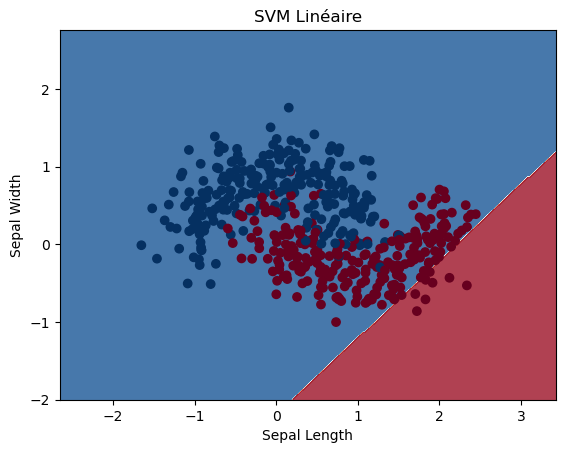

In [76]:
# On représente maintenant les frontières de décision 

Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
plt.title('SVM Linéaire')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

On pourra également regarder les performances du modèle en étudiant sa matrice de confusion et calculer différentes métriques de performance.

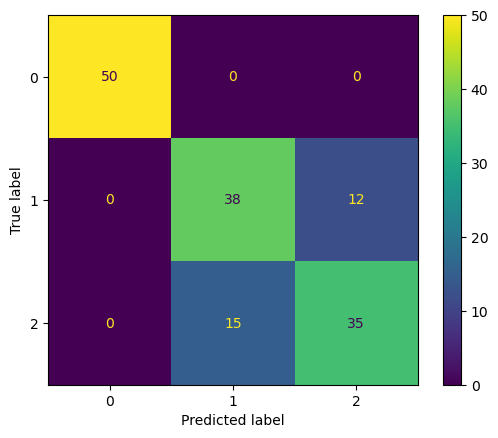

In [37]:
# On commence par regarder les prédictions effectuées par notre modèle sur les données.

prediction = clf_linear.predict(X)

# On peut maintenant regarder la matrice de confusion de notre matrice et en faire une représentation graphique

confusion_pred = confusion_matrix(y, prediction) # Mettre les arguments dans l'ordre (true_label, predicted_label)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_pred,
                              display_labels=clf_linear.classes_)
disp.plot()
plt.show()



In [43]:
# Calcul de l'accuracy

accuracy_score(y,prediction)

0.82

$$ $$

**Question 1 :** Refaire le même procédé avec le jeu de données généré par le code ci-dessous

$$ $$

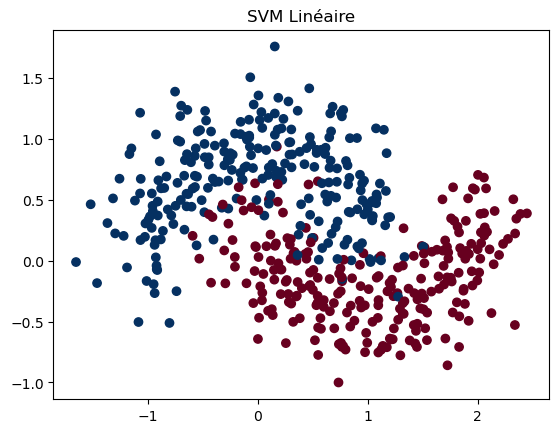

In [75]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
plt.title('SVM Linéaire')
plt.show()

Pour le moment, nous n'avons regarder qu'un problème particulier du SVM.

$$ $$

**Question 2** : Rappeler le problème d'optimisation du SVM ainsi que la signification de l'hyperparamètre associé au problème.

$$ $$

On va maintenant chercher à regarder l'influence de cet hyperparamètre sur les performances du modèle sur notre jeu de données mais aussi l'impact que cela peut avoir sur la frontière de décision. On commence donc par se donner une grille de valeurs de l'hyperparamètre C afin d'étudier son impact.

In [67]:
X = iris.data[:, :2] # On va garder uniquement les deux premières variables
y = iris.target

C_values = [0.001, 100]

On va maitenant regarder graphiquement et empiriquement l'influence de cet hyper-paramètre C

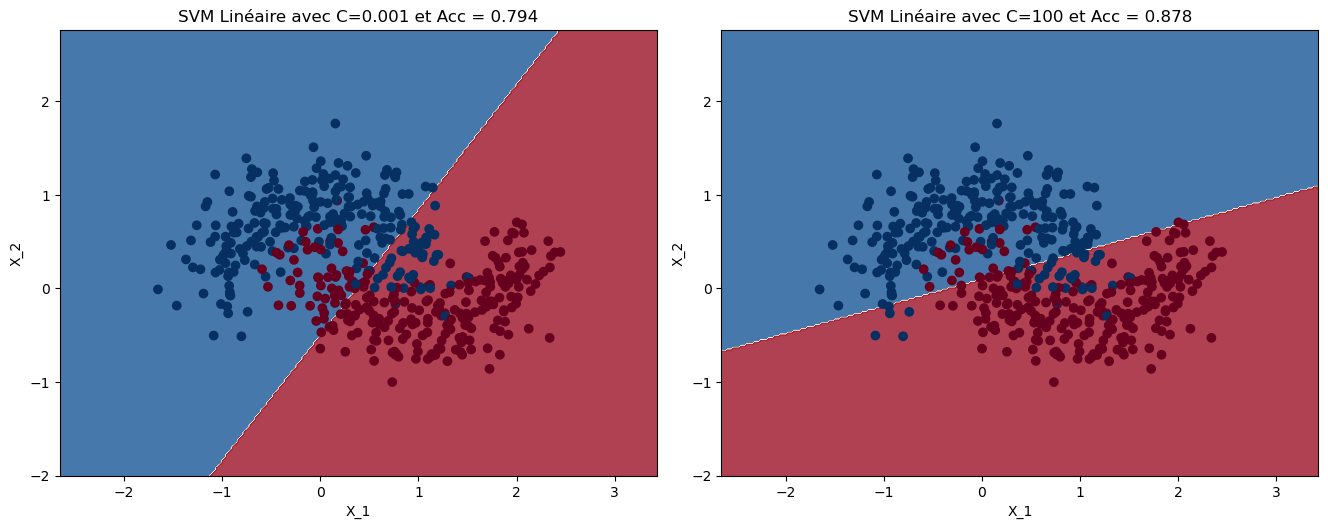

In [77]:
plt.figure(figsize=(20, 10))
for i, C in enumerate(C_values, 1):
    # Apprentissage du modèle et évaluation des performances
    
    clf_lin = SVC(kernel='linear', C = C)
    clf_lin.fit(X, y)

    prediction = clf_lin.predict(X)
    acc_lin = accuracy_score(y,prediction)

    # On va créer à nouveau notre même fenêtre graphique
    h = 0.02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_lin = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_lin = Z_lin.reshape(xx.shape)
    plt.contourf(xx, yy, Z_lin, cmap=plt.cm.RdBu_r, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
    plt.title(f'SVM Linéaire avec C={C} et Acc = {acc_lin}')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

$$ $$

**Question 4**: Rappeler la définition d'un point support de modèle de SVM et mettre en évidence ces derniers sur le jeu de données précédent.

$$ $$

$$ $$

**Question 5**: Faire le lien entre l'hyperparamètre C et le nombre de points supports du modèle. Est-ce une bonne chose un nombre important 
de points supports ? Quels sont les avantages/inconvénients d'avoir de petites ou grandes valeurs de C ?

$$ $$

## B. Apprentissage d'un SVM Gaussien (Noyau RBF)

Pour le moment, nous nous sommes uniquement intéressé au problème du SVM linéaire dont la formulation a été rappelée dans la deuxième question. On va maintenant reprendre notre jeu de données des lunes et on peut remarquer que ce dernier est difficilement linéaire séparable.
Il est donc nécessaire d'employer des approches plus complexes basées sur les méthodes à noyaux. Le noyau le plus couramment utilisé est le noyau gaussien défini par :
$$ $$

$$\forall x,x' \in\mathbb{R}^d, \quad k(x,x') = \exp(-\gamma \Vert x-x' \Vert^2_2).$$

Dans ce cas là, nous avons un nouvel hyperparamètre à optimiser qui est l'hyperparamètre $gamma$. 

$$ $$

**Question 6**: Obsever graphiquement l'influence de cet hyperparamètre $\gamma$ sur la frontière de décision de votre modèle et sur les performances de ce dernier en fixant la valeur de $C$ à $1$.

$$ $$

$$ $$

**Question 7**: A nouveau, regarder comment évolue le nombre de points supports en fonction de la valeur de $\gamma$.

$$ $$

# II. Apprentissage d'un modèle et cross-validation des hyper-paramètres

On souhaite maintenant regarder comment cross-valider les hyper-paramètres liés à ces deux modèles afin de pouvoir comparer leur performances et de déterminer le modèle le plus approprié sur un jeu de données. La première étape consiste à créer nos jeux de données Train et Test.

In [97]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_breast_cancer

$$ $$

**Question 1**: Télécharger le jeu de données breast_cancer et séparer votre jeu de données en deux ensembles train et test. On prendra soin de conserver 75% des données pour l'entraînement.

$$ $$

On considère, pour simplifier notre modèle de SVM linéaire pour lequel on cherche à optimiser l'hyperparamètre $C$. 
Pour cela, nous devons créer différents folds à partir de notre ensemble d'entraînement afin de faire la cross-validation de notre modèle.

$$ $$


$$ $$

**Question 2**: Donnez vous une liste de valeurs de $C$ et créer vos différents groupes d'apprentissage et de validation qui vous permettront de déterminer la meilleur valeur de l'hyperparamètre. On pensera à utiliser la fonction *StratifiedKFold*

$$ $$

$$ $$

**Question 3**: Ecrire une boucle permettant de trouver le meilleur hyperparamètre pour votre problème de classification. Attention, rappelez-vous, il vous faudra penser à normaliser les données à chaque itération de la cross-validation. Il faudra ensuite extraire le mielleur hyperparamètre après la cross-validation.

$$ $$

$$ $$

**Question 4**: Finir votre procédure et evaluer les performances de votre modèle sur l'ensemble test. Est-ce que cela vous a permis d'apprendre le meilleur modèle, *i.e.* est-ce que vous avez retenu la valeur de $C$ qui permet d'optimiser le score sur l'ensemble test ?

$$ $$

$$ $$

Il y bien sûr des moyens beaucoup plus rapides pour faire de la Cross-Validation à l'aide du processus présenté ci-dessous

$$ $$

In [98]:
from sklearn.model_selection import GridSearchCV

In [ ]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(iris.data, iris.target)
print(clf.best_score_)
print(clf.best_params_)

$$ $$

**Question 5**: Essayez maintenant d'écrire un code complet qui vous permettra de comparer les performances d'un SVM Linéaire et d'un SVM Gaussien sur ce jeux de données.
  
$$ $$

$$ $$

**Question 6**: Appliquer la même procédure mais sur un ensemble de jeux de données.
  
$$ $$